# Task 1: Prediction using Supervised ML (Predict percentage of a student based on study hours)
>**Author: Sabarish Padmakumar**

>**Data Science and Business Analytics Intern at The Sparks Foundation**

>**TSF-GRIP batch of June '22**

### **Simple Linear Regression**
>In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

In [4]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#reading pertinent data
data = pd.read_csv("https://bit.ly/w-data")

data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


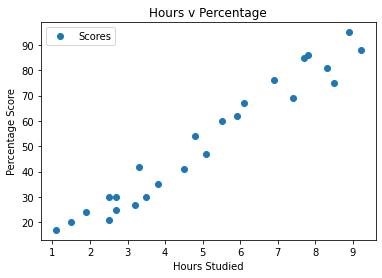

In [6]:
#plotting the distribution of scores

data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours v Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

**From the graph, it is evident that there is a positive linear relation between the number of hours studies and percentage of score.**

# Preparing the Data
>This step involves dividing the data into attributes and labels.

In [12]:
x = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

In [13]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(x, y, test_size=0.2, random_state=0)

# Training the Algorithm
>Employing Linear Regression.

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(XTrain, YTrain)

LinearRegression()

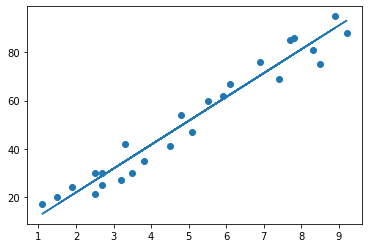

In [21]:
#plotting the regression line
line = reg.coef_ * x + reg.intercept_

#plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

# Making Predictions
>After the alogrithm has been trained, we make predictions.

In [24]:
print(XTest)
YPredicted = reg.predict(XTest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
#actual vs predicted
df = pd.DataFrame({"Actual": YTest, "Predicted": YPredicted})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
#custom data
hours = [[9.25]]
custom = reg.predict(hours)
print("Number of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(custom[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluation of the Model
>This step will evaluate the performance of the algorithm.

In [40]:
#using mean absolute error
from sklearn import metrics
print("MAE: {}".format(metrics.mean_absolute_error(YTest, YPredicted)))

#using mean squared error
print("MSE: {}".format(metrics.mean_squared_error(YTest, YPredicted)))

MAE: 4.183859899002975
MSE: 21.5987693072174
